# Part 1: สถานการ์ณค่าไฟประเทศไทยในปัจจุบัน

In [2]:
pip install geopandas

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
%matplotlib inline
plt.style.use('seaborn')

<ipython-input-2-67f4a1ae1920>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
#import file
data = files.upload()

Saving FIN.csv to FIN.csv


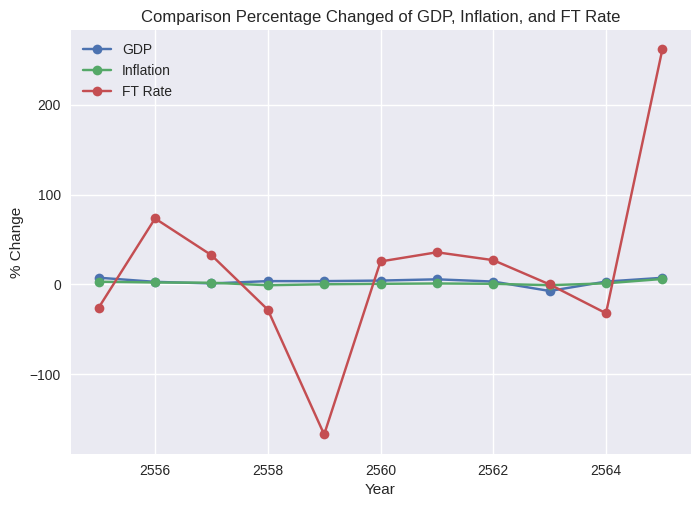

In [9]:
data = pd.read_csv('%change.csv')

year = data['Year']
gdp_change = data['GDP (%change)']
inflation_change = data['Inflation(%change)']
ft_change = data['Ft (%change)']
#Plot
plt.plot(year, gdp_change, marker='o', label='GDP')
plt.plot(year, inflation_change, marker='o', label='Inflation')
plt.plot(year, ft_change, marker='o', label='FT Rate')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.title('Comparison Percentage Changed of GDP, Inflation, and FT Rate')
plt.legend()
plt.show()

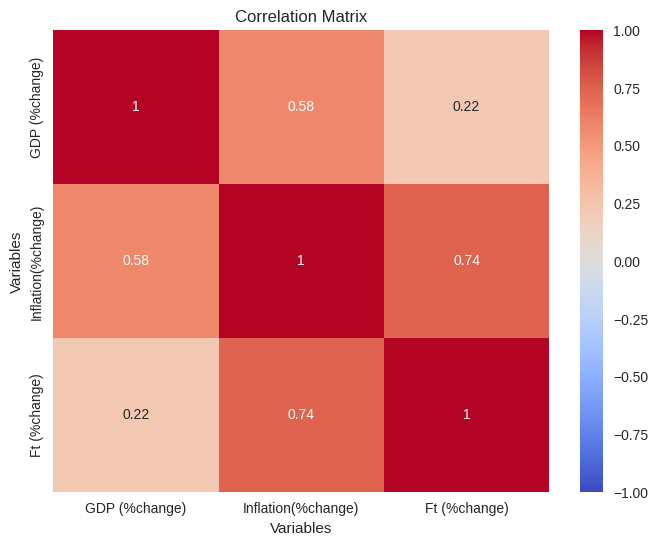

In [10]:
data = pd.read_csv('%change.csv')
columns = ['GDP (%change)', 'Inflation(%change)', 'Ft (%change)']
data = data[columns]
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.title('Correlation Matrix')
plt.show()

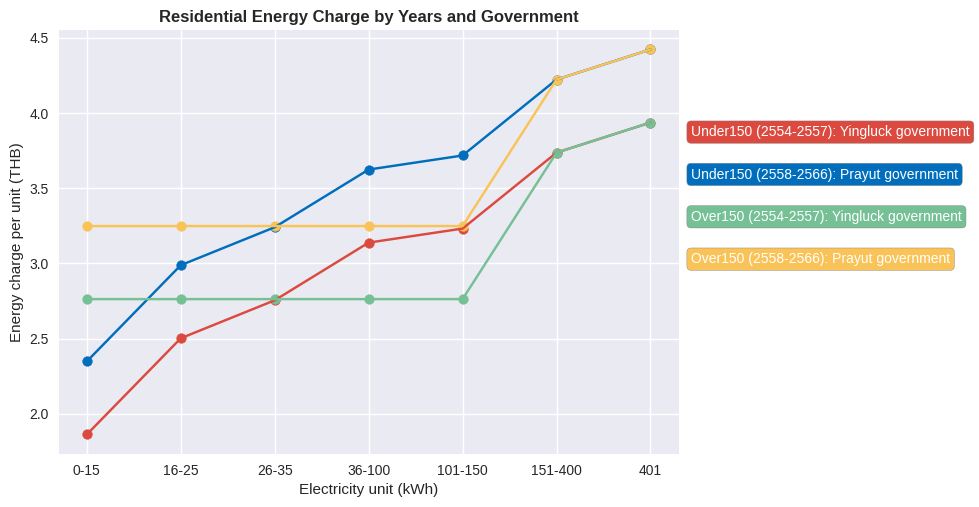

In [119]:
df = pd.read_csv('Resident.csv')

# Group data
grouped_df = df.groupby(['0-15', '16-25', '26-35', '36-100', '101-150', '151-400', '401']).size().reset_index(name='Count')

x_values = grouped_df.columns[:-1]
y_values = grouped_df['Count']

line_messages = [
    "Under150 (2554-2557): Yingluck government",
    "Under150 (2558-2566): Prayut government",
    "Over150 (2554-2557): Yingluck government",
    "Over150 (2558-2566): Prayut government"
]

line_colors = ['#DC493F', '#006EBC', '#75C095', '#FAC357']

# Plot
for i in range(len(grouped_df)):
    plt.scatter(x_values, grouped_df.iloc[i, :-1], c=line_colors[i])
    plt.plot(x_values, grouped_df.iloc[i, :-1], color=line_colors[i]) # Plot lines

# Add message boxes
for i, line_message in enumerate(line_messages):
    plt.text(1.02, 0.75 - i * 0.1, line_message, transform=plt.gca().transAxes,
             color='white', bbox=dict(facecolor=line_colors[i], edgecolor='gray', boxstyle='round,pad=0.3'))

plt.xlabel('Electricity unit (kWh)')
plt.ylabel('Energy charge per unit (THB)')
plt.title('Residential Energy Charge by Years and Government', fontweight='bold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

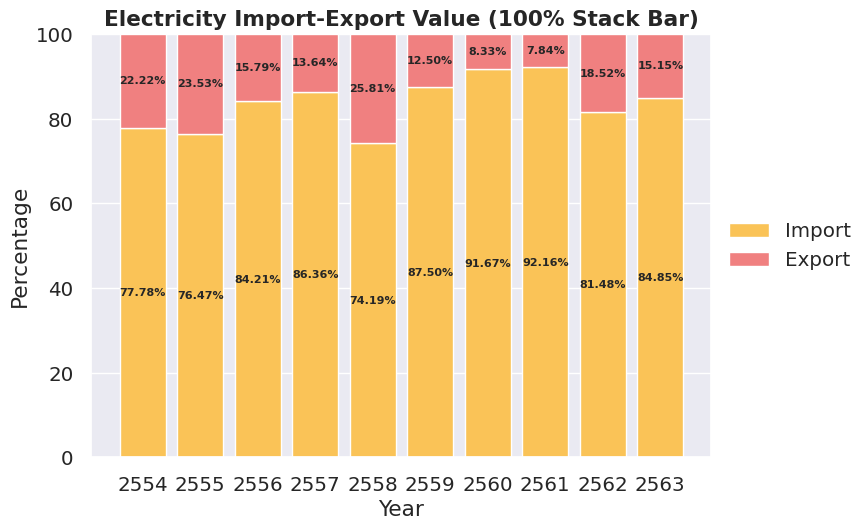

In [176]:
df = pd.read_csv('Im-Ex.csv')
df = df.transpose()

# Set headers
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

# Calculate percentage
df['Import Total'] = df['Import Value'].astype(int)
df['Export Total'] = df['Export Value'].astype(int)
df['Total'] = df['Import Total'] + df['Export Total']
df['Import Percentage'] = df['Import Total'] / df['Total'] * 100
df['Export Percentage'] = df['Export Total'] / df['Total'] * 100

# Plot
fig, ax = plt.subplots()
ax.bar(df.index, df['Import Percentage'], label='Import', color='#FAC357')
ax.bar(df.index, df['Export Percentage'], bottom=df['Import Percentage'], label='Export', color='#F08080')
ax.set_title('Electricity Import-Export Value (100% Stack Bar)', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)

# Display percentage
for i, v in enumerate(df['Import Percentage']):
    ax.text(i, v/2, f"{v:.2f}%", ha='center', va='center', fontweight='bold', fontsize=8)
for i, v in enumerate(df['Export Percentage']):
    ax.text(i, df['Import Percentage'][i] + v/2, f"{v:.2f}%", ha='center', va='center', fontweight='bold', fontsize=8)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<ipython-input-88-2946df0abebe>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


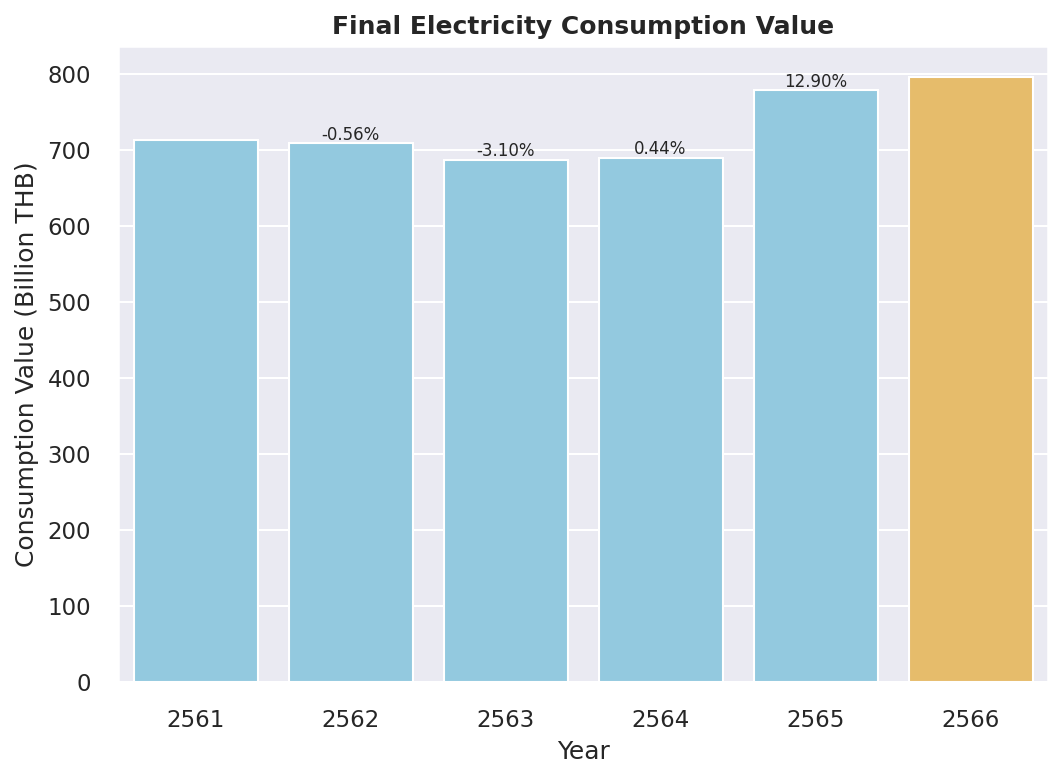

In [88]:
df = pd.read_csv('FIN.csv')

#Calculate %change to forecast Y2566
df['Value'] = df['Value'].astype(int)
df['%change'] = (df['Value'] - df['Value'].shift(1)) / df['Value'].shift(1) * 100
average = df['%change'].mean()
Y2566 = df[df['Value'] == 779]['Value'].values[0] + ((df[df['Value'] == 779]['Value'].values[0]) * average / 100)
new_data = pd.DataFrame({'Year': [2566], 'Value': [int(Y2566)]})
df = df.append(new_data, ignore_index=True)
line_message = df['%change']

#Plot
x_values = df.Year
y_values = df.Value
bar_colors = ['skyblue','skyblue','skyblue','skyblue','skyblue', '#FAC357' ]
sns.barplot(x=x_values, y=y_values, palette=bar_colors)
plt.xlabel('Year')
plt.ylabel('Consumption Value (Billion THB)')
plt.title('Final Electricity Consumption Value', fontweight='bold')
for i, value in enumerate(df['%change']):
    if not np.isnan(value):  #Withot Nan
        plt.text(i, y_values[i] + 5, f'{value:.2f}%', ha='center', fontsize=8)
# Show the plot
plt.show()